In [1]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymc3 as pm
import seaborn as sns


az.style.use('arviz-darkgrid')

In [2]:
WAFFLE_DATA = 'waffle_divorce.csv'
DATA_FOLDER = '../../data'

In [3]:
df_waf = pd.read_csv(f'{DATA_FOLDER}/{WAFFLE_DATA}')
df_waf.head()

,Unnamed: 0,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage.SE,Divorce,Divorce.SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
0,1,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45
1,2,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00
2,3,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00
3,4,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26
4,5,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00


In [4]:
df_waf['age_stan'] = (df_waf['MedianAgeMarriage'] - df_waf['MedianAgeMarriage'].mean()) / df_waf['MedianAgeMarriage'].std()
df_waf['divorce_stan'] = (df_waf['Divorce'] - df_waf['Divorce'].mean()) / df_waf['Divorce'].std()
df_waf['marriage_stan'] = (df_waf['Marriage'] - df_waf['Marriage'].mean()) /df_waf['Marriage'].std()

# Predictor Residual Plots

## Marriage rate against median age

$$
\begin{align*}
    M_i     & \sim N(\mu_i, \sigma) \\
    \mu_i   & \sim \alpha + \beta_A \cdot A_i\\
    \alpha  & \sim N(0, 0.2) \\
    \beta_A & \sim N(0, 0.5) \\
    \sigma  & \sim \text{Exponential}(1)
\end{align*}
$$

### Code 5.13

In [5]:
with pm.Model() as m_5_4:
    alpha = pm.Normal('alpha', mu=0.0, sigma=0.2)
    beta_A = pm.Normal('beta_A', mu=0.0, sigma=0.5)
    sigma = pm.Exponential('sigma', lam=1.0)
    
    mu = pm.Deterministic('mu', alpha + beta_A * df_waf['age_stan'])
    M = pm.Normal('marriage', mu=mu, sigma=sigma, observed=df_waf['marriage_stan'])
    
    trace_5_4 = pm.sample(5000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_A, alpha]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 11 seconds.


In [6]:
df_tr_5_4 = pm.trace_to_dataframe(trace_5_4)
df_tr_5_4.head()

,alpha,beta_A,sigma,mu__0,mu__1,mu__2,mu__3,mu__4,mu__5,mu__6,...,mu__40,mu__41,mu__42,mu__43,mu__44,mu__45,mu__46,mu__47,mu__48,mu__49
0,0.013429,-0.761138,0.758677,0.474900,0.536103,0.168885,1.086929,-0.443145,0.230088,-0.932768,...,0.291291,0.536103,0.536103,1.698959,-0.504348,-0.198333,0.107682,0.658508,-0.137130,1.148132
1,-0.025783,-0.720791,0.809524,0.411225,0.469184,0.121432,0.990811,-0.458154,0.179391,-0.921823,...,0.237349,0.469184,0.469184,1.570397,-0.516112,-0.226319,0.063474,0.585101,-0.168361,1.048770
2,0.026102,-0.673026,0.614323,0.434150,0.488268,0.163561,0.975328,-0.377617,0.217679,-0.810560,...,0.271797,0.488268,0.488268,1.516507,-0.431735,-0.161146,0.109443,0.596504,-0.107028,1.029446
3,-0.060324,-0.696310,0.798924,0.361842,0.417832,0.081891,0.921743,-0.478010,0.137881,-0.925931,...,0.193871,0.417832,0.417832,1.481644,-0.534000,-0.254049,0.025901,0.529812,-0.198059,0.977733
4,0.060110,-0.655094,0.613384,0.457286,0.509962,0.193907,0.984046,-0.332853,0.246583,-0.754261,...,0.299259,0.509962,0.509962,1.510806,-0.385529,-0.122149,0.141231,0.615314,-0.069473,1.036722


In [7]:
df_mu_5_4 = df_tr_5_4.filter(regex='(mu.*)')
df_mu_5_4.head()

,mu__0,mu__1,mu__2,mu__3,mu__4,mu__5,mu__6,mu__7,mu__8,mu__9,...,mu__40,mu__41,mu__42,mu__43,mu__44,mu__45,mu__46,mu__47,mu__48,mu__49
0,0.474900,0.536103,0.168885,1.086929,-0.443145,0.230088,-0.932768,-0.320739,-2.218030,-0.198333,...,0.291291,0.536103,0.536103,1.698959,-0.504348,-0.198333,0.107682,0.658508,-0.137130,1.148132
1,0.411225,0.469184,0.121432,0.990811,-0.458154,0.179391,-0.921823,-0.342237,-2.138953,-0.226319,...,0.237349,0.469184,0.469184,1.570397,-0.516112,-0.226319,0.063474,0.585101,-0.168361,1.048770
2,0.434150,0.488268,0.163561,0.975328,-0.377617,0.217679,-0.810560,-0.269382,-1.947034,-0.161146,...,0.271797,0.488268,0.488268,1.516507,-0.431735,-0.161146,0.109443,0.596504,-0.107028,1.029446
3,0.361842,0.417832,0.081891,0.921743,-0.478010,0.137881,-0.925931,-0.366030,-2.101723,-0.254049,...,0.193871,0.417832,0.417832,1.481644,-0.534000,-0.254049,0.025901,0.529812,-0.198059,0.977733
4,0.457286,0.509962,0.193907,0.984046,-0.332853,0.246583,-0.754261,-0.227501,-1.860456,-0.122149,...,0.299259,0.509962,0.509962,1.510806,-0.385529,-0.122149,0.141231,0.615314,-0.069473,1.036722


In [8]:
mu_means_5_4 = df_mu_5_4.apply(np.mean, axis=0)

mu_means_5_4[:5]

mu__0    0.418643
mu__1    0.474253
mu__2    0.140592
mu__3    0.974744
mu__4   -0.415510
dtype: float64

In [9]:
residuals_marriage = df_waf['marriage_stan'].values - mu_means_5_4.values
residuals_marriage[:5]

array([-0.39599851,  1.0755489 , -0.09161747,  0.68037879,  0.14852037])

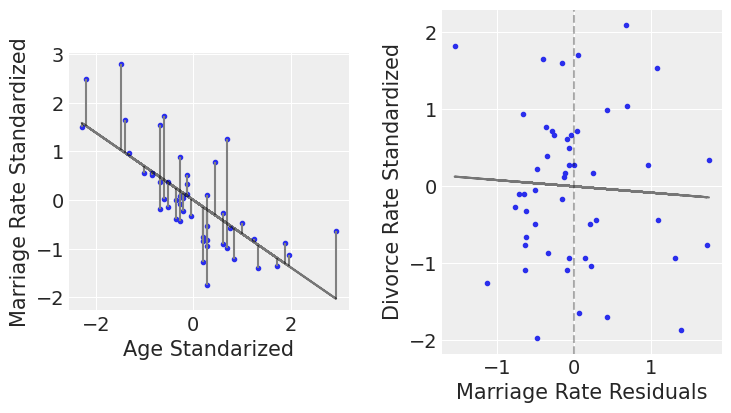

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(df_waf['age_stan'], df_waf['marriage_stan'], marker='.')
ax1.plot(df_waf['age_stan'], mu_means_5_4, 'k-', alpha=0.5)
ax1.vlines(df_waf['age_stan'], mu_means_5_4.values, mu_means_5_4.values + residuals_marriage, colors='grey')

ax1.set_xlabel('Age Standarized')
ax1.set_ylabel('Marriage Rate Standardized')
ax1.set_aspect('equal')

ax2.scatter(residuals_marriage, df_waf['divorce_stan'], marker='.')
ax2.axvline(x=0.0, ls='--', color='k', alpha=0.3)

ax2.set_xlabel('Marriage Rate Residuals')
ax2.set_ylabel('Divorce Rate Standardized')
ax2.set_aspect('equal')


m, c = np.polyfit(residuals_marriage, df_waf['divorce_stan'], deg=1)
fitted_line = [m * x + c for x in residuals_marriage]

ax2.plot(residuals_marriage, fitted_line, 'k-', alpha=0.5)

plt.show()

The plot of the divorce rate against the marriage rate residuals can be thought of as a plot of the divorce rate against the marriage rate after controlling the median age at marriage. As the plot shows, there is very little variation of the divorce rate with the residuals suggesting that the divorce rate is not causally related to the marriage rate (as in having a a directed arrow from $M$ to $D$). 

## Marriage rate against median age
$$
\begin{align*}
    A_i     & \sim N(\mu_i, \sigma) \\
    \mu_i   & \sim \alpha + \beta_M \cdot M_i\\
    \alpha  & \sim N(0, 0.2) \\
    \beta_M & \sim N(0, 0.5) \\
    \sigma  & \sim \text{Exponential}(1)
\end{align*}
$$

In [11]:
with pm.Model() as m_5_5:
    alpha = pm.Normal('alpha', mu=0.0, sigma=0.2)
    beta_M = pm.Normal('beta_M', mu=0.0, sigma=0.5)
    sigma = pm.Exponential('sigma', lam=1.0)
    
    mu = pm.Deterministic('mu', alpha + beta_M * df_waf['marriage_stan'])
    A = pm.Normal('age', mu=mu, sigma=sigma, observed=df_waf['age_stan'])
    
    trace_5_5 = pm.sample(5000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_M, alpha]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 14 seconds.


In [12]:
df_tr_5_5 = pm.trace_to_dataframe(trace_5_5)
df_tr_5_5.head()

,alpha,beta_M,sigma,mu__0,mu__1,mu__2,mu__3,mu__4,mu__5,mu__6,...,mu__40,mu__41,mu__42,mu__43,mu__44,mu__45,mu__46,mu__47,mu__48,mu__49
0,0.021551,-0.676101,0.707038,0.006241,-1.026271,-0.011561,-1.097479,0.202062,-0.581223,0.558101,...,0.024043,0.148657,-0.225184,-1.667141,0.682715,-0.047165,-0.207382,-0.349798,0.540299,-1.862962
1,-0.135024,-0.839070,0.823839,-0.154024,-1.435415,-0.176117,-1.523787,0.088999,-0.883091,0.530858,...,-0.131931,0.022720,-0.441232,-2.230762,0.685509,-0.220303,-0.419139,-0.595883,0.508765,-2.473784
2,-0.168566,-0.846978,0.820716,-0.187745,-1.481213,-0.210046,-1.570418,0.057568,-0.923684,0.503592,...,-0.165444,-0.009336,-0.477660,-2.284056,0.659700,-0.254649,-0.455359,-0.633769,0.481290,-2.529369
3,0.061256,-0.621078,0.610379,0.047193,-0.901292,0.030839,-0.966705,0.227078,-0.492462,0.554141,...,0.063546,0.178018,-0.165399,-1.490006,0.668613,-0.001867,-0.149046,-0.279871,0.537788,-1.669891
4,0.061256,-0.621078,0.610379,0.047193,-0.901292,0.030839,-0.966705,0.227078,-0.492462,0.554141,...,0.063546,0.178018,-0.165399,-1.490006,0.668613,-0.001867,-0.149046,-0.279871,0.537788,-1.669891


In [13]:
df_mu_5_5 = df_tr_5_5.filter(regex='(mu.*)')

mu_means_5_5 = df_mu_5_5.apply(np.mean, axis=0)
residuals_age = df_waf['age_stan'].values - mu_means_5_5.values

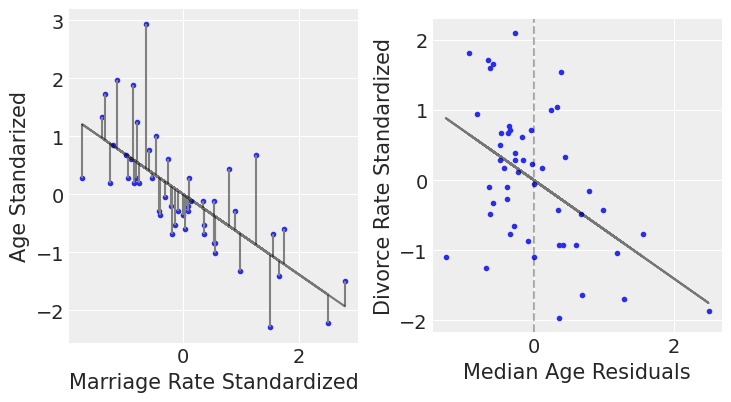

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(df_waf['marriage_stan'], df_waf['age_stan'], marker='.')
ax1.plot(df_waf['marriage_stan'], mu_means_5_5, 'k-', alpha=0.5)
ax1.vlines(df_waf['marriage_stan'], mu_means_5_5.values, mu_means_5_5.values + residuals_age, colors='grey')

ax1.set_ylabel('Age Standarized')
ax1.set_xlabel('Marriage Rate Standardized')
ax1.set_aspect('equal')

ax2.scatter(residuals_age, df_waf['divorce_stan'], marker='.')
ax2.axvline(x=0.0, ls='--', color='k', alpha=0.3)

ax2.set_xlabel('Median Age Residuals')
ax2.set_ylabel('Divorce Rate Standardized')
ax2.set_aspect('equal')


m, c = np.polyfit(residuals_age, df_waf['divorce_stan'], deg=1)
fitted_line = [m * x + c for x in residuals_age]

ax2.plot(residuals_age, fitted_line, 'k-', alpha=0.5)

plt.show()

## Posterior Prediction Plots Model 5.3

$$
\begin{align*}
    D_i     & \sim N(\mu_i, \sigma) \\
    \mu_i   & \sim \alpha + \beta_A \cdot A_i + \beta_M \cdot M_i\\
    \alpha  & \sim N(0, 0.2) \\
    \beta_A & \sim N(0, 0.5) \\
    \beta_M & \sim N(0, 0.5) \\
    \sigma  & \sim \text{Exponential}(1)
\end{align*}
$$

### Code 5.15 and 5.16

In [15]:
with pm.Model() as m_5_3:
    alpha = pm.Normal('alpha', mu=0.0, sigma=0.2)
    beta_A = pm.Normal('beta_A', mu=0.0, sigma=0.5)
    beta_M = pm.Normal('beta_M', mu=0.0, sigma=0.5)
    sigma = pm.Exponential('sigma', lam=1.0)
    
    mu = pm.Deterministic('mu', alpha + beta_A * df_waf['age_stan'] + beta_M * df_waf['marriage_stan'])
    D = pm.Normal('divorce', mu=mu, sigma=sigma, observed=df_waf['divorce_stan'])
    
    trace_5_3 = pm.sample(5000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_M, beta_A, alpha]


Sampling 4 chains for 2_000 tune and 5_000 draw iterations (8_000 + 20_000 draws total) took 13 seconds.


In [16]:
df_tr_5_3 = pm.trace_to_dataframe(trace_5_3)

df_mu_5_3 = df_tr_5_3.filter(regex='(mu.*)')

mu_means_5_3 = df_mu_5_3.apply(np.mean, axis=0)

summary_all = az.summary(trace_5_3, hdi_prob=0.89)
summary_all.head()

/home/somnath/install/anaconda3/envs/stat-rethink-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,-0.000,0.102,-0.162,0.163,0.001,0.001,14593.0,9464.0,14608.0,12071.0,1.0
beta_A,-0.609,0.160,-0.862,-0.354,0.001,0.001,11873.0,11873.0,11919.0,11780.0,1.0
beta_M,-0.063,0.159,-0.315,0.188,0.001,0.001,11919.0,11278.0,11957.0,11868.0,1.0
sigma,0.828,0.088,0.688,0.961,0.001,0.001,14065.0,13735.0,14064.0,11498.0,1.0
mu[0],0.368,0.139,0.144,0.583,0.001,0.001,13352.0,13325.0,13352.0,13358.0,1.0


In [17]:
summary_all.index

Index(['alpha', 'beta_A', 'beta_M', 'sigma', 'mu[0]', 'mu[1]', 'mu[2]',
       'mu[3]', 'mu[4]', 'mu[5]', 'mu[6]', 'mu[7]', 'mu[8]', 'mu[9]', 'mu[10]',
       'mu[11]', 'mu[12]', 'mu[13]', 'mu[14]', 'mu[15]', 'mu[16]', 'mu[17]',
       'mu[18]', 'mu[19]', 'mu[20]', 'mu[21]', 'mu[22]', 'mu[23]', 'mu[24]',
       'mu[25]', 'mu[26]', 'mu[27]', 'mu[28]', 'mu[29]', 'mu[30]', 'mu[31]',
       'mu[32]', 'mu[33]', 'mu[34]', 'mu[35]', 'mu[36]', 'mu[37]', 'mu[38]',
       'mu[39]', 'mu[40]', 'mu[41]', 'mu[42]', 'mu[43]', 'mu[44]', 'mu[45]',
       'mu[46]', 'mu[47]', 'mu[48]', 'mu[49]'],
      dtype='object')

In [18]:
summary_all.loc['mu[0]', :]

mean             0.368
sd               0.139
hdi_5.5%         0.144
hdi_94.5%        0.583
mcse_mean        0.001
mcse_sd          0.001
ess_mean     13352.000
ess_sd       13325.000
ess_bulk     13352.000
ess_tail     13358.000
r_hat            1.000
Name: mu[0], dtype: float64

In [19]:
summary_mu = summary_all.loc['mu[0]':].copy()
lower = summary_mu['hdi_5.5%']
upper = summary_mu['hdi_94.5%']

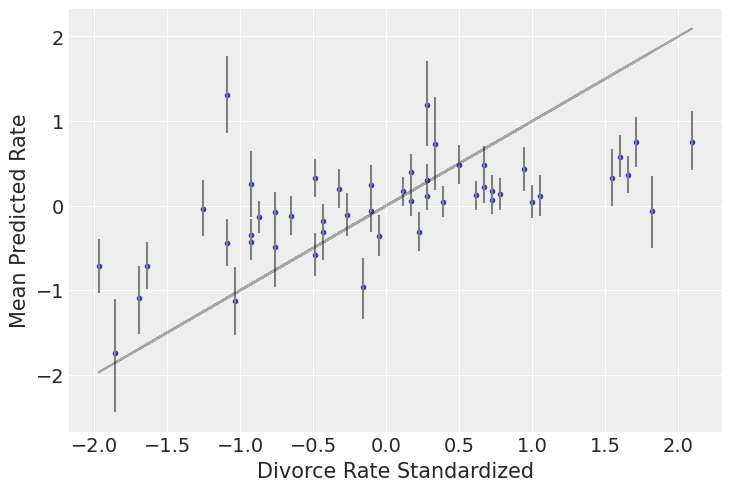

In [20]:
fig, ax = plt.subplots(1, 1)

ax.scatter(df_waf['divorce_stan'], mu_means_5_3.values, marker='.')
ax.vlines(df_waf['divorce_stan'], lower.values, upper.values, colors='grey')

ax.plot(df_waf['divorce_stan'], df_waf['divorce_stan'], color='black', alpha=0.3)

ax.set_xlabel('Divorce Rate Standardized')
ax.set_ylabel('Mean Predicted Rate')

plt.show()

## Simulating Spurious Associations

In [21]:
from scipy.stats import norm


N = 1000
x_real = norm.rvs(loc=0, scale=1, size=N)
x_spur = norm.rvs(loc=x_real, scale=1)
y = norm.rvs(loc=x_real, scale=1)

### The Model

$$
\begin{align*}
    y       & \sim N(\mu_i, \sigma) \\
    \mu_i   & \sim \alpha + \beta_r \cdot x_r + \beta_s \cdot x_s\\
    \alpha  & \sim N(0, 0.2) \\
    \beta_r & \sim N(0, 0.5) \\
    \beta_s & \sim N(0, 0.5) \\
    \sigma  & \sim \text{Exponential}(1)
\end{align*}
$$


where $x_r$ stands for the real causal predictor and $x_s$ is the spurious predictor.

In [22]:
with pm.Model() as m_spur:
    alpha = pm.Normal('alpha', mu=0.0, sigma=0.2)
    beta_r = pm.Normal('beta_r', mu=0.0, sigma=0.5)
    beta_s = pm.Normal('beta_s', mu=0.0, sigma=0.5)
    sigma = pm.Exponential('sigma', lam=1.0)
    
    mu = pm.Deterministic('mu', alpha + beta_r * x_real + beta_s * x_spur)
    Y = pm.Normal('outcome', mu=mu, sigma=sigma, observed=y)
    
    trace_spur = pm.sample(5000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_s, beta_r, alpha]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 14 seconds.


In [23]:
summary = az.summary(trace_spur, var_names=['alpha', 'beta_r', 'beta_s'], hdi_prob=0.89)
summary

/home/somnath/install/anaconda3/envs/stat-rethink-pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,0.008,0.032,-0.042,0.058,0.0,0.0,18505.0,11671.0,18515.0,14288.0,1.0
beta_r,0.952,0.046,0.877,1.023,0.0,0.0,11112.0,11112.0,11114.0,14034.0,1.0
beta_s,0.002,0.031,-0.048,0.051,0.0,0.0,11242.0,11242.0,11245.0,13729.0,1.0


As expected, the posterior mean of $\beta_s$ is close to $0$, whereas that of $\beta_r$ is $1$.